Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("dataset.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
## preprocessing
# check missing valuse 
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.shape

(303, 14)

In [6]:
# checking for duplicates 
df.duplicated().sum()

1

In [7]:
df=df.drop_duplicates()
df.shape

(302, 14)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [9]:
## seggregating dependent and independent features 
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [10]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# split model into train and test
X_train,X_test,y_trian,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [14]:
X_train.shape,X_test.shape,y_trian.shape,y_test.shape

((211, 13), (91, 13), (211,), (91,))

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rfc=RandomForestClassifier(n_estimators=100,max_depth=10)

In [17]:
rfc.fit(X_train,y_trian)

RandomForestClassifier(max_depth=10)

In [18]:
y_pred=rfc.predict(X_test)

In [19]:
# Evaluating the performance of model
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(recall_score(y_pred,y_test))
print(precision_score(y_pred,y_test))
print(f1_score(y_pred,y_test))

0.7692307692307693
[[28  3]
 [18 42]]
0.7
0.9333333333333333
0.8


In [20]:
feature_importance=rfc.feature_importances_
top_5_features=np.argsort(feature_importance)[-5:]

In [21]:
top_5_features

array([ 0,  9,  2, 11,  7])

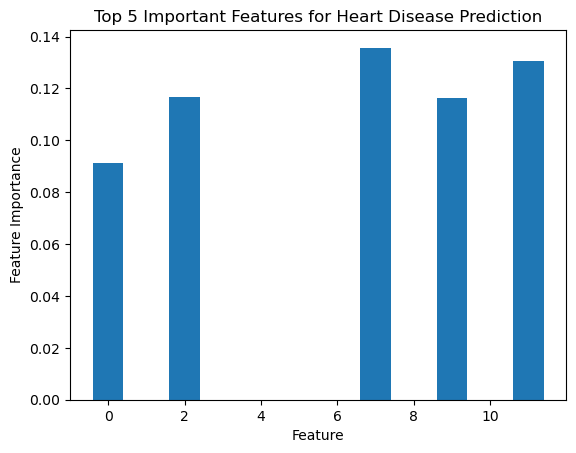

In [22]:
plt.bar(top_5_features, feature_importance[top_5_features])
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Top 5 Important Features for Heart Disease Prediction')
plt.show()

In [23]:

params={
    'n_estimators':[50,100,150,200],
    'max_depth':[6,7,8,9,10],
    'min_samples_split':[2,4,6],
    'min_samples_leaf':[1,2,3,4]
}

In [24]:
## Tuning hyperparameters 
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(RandomForestClassifier(),param_grid=params,cv=5,refit=True)

In [25]:
grid.fit(X_train,y_trian)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 150, 200]})

In [26]:
grid.best_score_

0.8629014396456258

In [27]:
y_pred1=grid.predict(X_test)

In [28]:
## prerformance after tuning
print(accuracy_score(y_pred1,y_test))
print(confusion_matrix(y_pred1,y_test))

0.7692307692307693
[[29  4]
 [17 41]]


In [29]:
print("These are the best parameters that we got after hyperparameter tuning ",grid.best_params_)

These are the best parameters that we got after hyperparameter tuning  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [30]:
print(f"The score of the model with default parameters is:{accuracy_score(y_pred,y_test)}\n The performance of tunined model is:{accuracy_score(y_pred1,y_test)} ")

The score of the model with default parameters is:0.7692307692307693
 The performance of tunined model is:0.7692307692307693 


In [44]:
most_imp_features=rfc.feature_importances_.argsort()[-2:]
column_name=df.columns[most_imp_features]

In [70]:
print(column_name)

Index(['ca', 'thalach'], dtype='object')


In [74]:
print("'ca and thalach' are the two most important features ")

'ca and thalach' are the two most important features 
